### **Business scenario and problem**

---

**The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?**

---

The goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If company can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.e company.


---

### **PACE Strategy**

<div style="text-align: center;">
  <img src="./images/PACE.png" alt="" style="width:50%; transition: transform 0.2s;">
</div>

<!-- Add CSS for zoom effect -->
<style>
img:hover {
  transform: scale(1.5);
}
</style>

---
#### **1. Plan**

**The planning stage is where you conceptualize the scope of the project and develop the steps that will guide you through the process of completing a project.**

> At the beginning of a project, it is important to establish a solid foundation for success. Here you will define the scope of your project. This is when you will begin by identifying the informational needs of the organization. During the planning stage, you will have the widest viewpoint of a project. By assessing all of the factors and processes involved, you are mapping a path to completion, using your creativity to conceptualize a course of action. Here you will also take special note of tasks that may require an innovative approach within your workflow. 

#### **2. Analyze**

**The analyzing stage is where you will collect, prepare, and analyze all of the data for your project.**

> In the analyzing stage, you will interact with the data for the first time. Here you will acquire all of the data you will need for the project. Some datasets could come from primary sources within your organization. Others may need to be collected from secondary sources outside your company. You may even find that you need governmental or open source data. The analyzing stage is also where you will engage in exploratory data analysis or EDA. This involves cleaning, reorganizing and analyzing all of the necessary data for the project.

#### **3. Analyze**

**In the construction stage you will build models that will allow you access to hidden relationships locked within data.**

> Just as the name suggests, the construction stage is all about building. In this stage of PACE, you will be building, interpreting, and revising models. Some projects will require machine learning algorithms to uncover correlations within your data. You will use these correlations to uncover information from the data that would otherwise go unused. These relationships can help your organization make informed decisions about the future.

#### **4. Execute**

**In the execution stage you will present the finding of your analysis, receive feedback, and make revisions as necessary.**

> In the execution stage, you will put your analysis and construction into action. Here you will deliver your findings to the internal (inside of your organization) and external (outside of your organization) stakeholders. Quite often, this will involve stakeholders from the business-side of the companies you are working with. Presenting your findings is only a part of the execution stage. Stakeholders will provide feedback, ask questions, and make recommendations that you will collect and incorporate.e.e project.project.




---

## **Pace: Plan**

### Understand the business scenario and problem

project aim: what’s likely to make the employee leave the company?
Theur goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 
we you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### **Familiarize with the dataset**

<div style="text-align: center;">
  <img src="./images/table_describe.png" alt="Descriptive Alt Text" style="width:50%; transition: transform 0.2s;">
</div>

<!-- Add CSS for zoom effect -->
<style>
img:hover {
  transform: scalet 1.5);
}
</style>


**Independent variable：**
- satisfaction_level 
- last_evaluation	
- number_project	
- average_montly_hours 
- Work_accident 
- promotion_last_5years	
- Department	
- salary

**Dependent variable：**
- time_spend_company
- left

---

### Plan：**Read to import the packages** 

In [2]:
# Import packages
### YOUR CODE HERE ### 

# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

Load dataset and display rows of the dataframe

In [3]:
# Load dataset into a dataframe
df_raw = pd.read_csv("./HR_comma_sep.csv")

# Display first few rows of the dataframe
df_raw.head(n = 10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### Plan：EDA_Step 1. Data Exploration (Initial EDA and data cleaning)

#### P_EDA Step 1.1 Gather descriptive statistics about the data

In [5]:
# Gather basic information about the data
"""
df.info()
    verbose (default True): Whether to print the full summary.
    buf (default None): File-like object to write the output to. By default, it prints to the console.
    max_cols (default None): When the DataFrame has more than max_cols columns, the output will be truncated.
"""
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
# Gather descriptive statistics about the data
"""
df.describe()
    percentiles (default [0.25, 0.5, 0.75]): List of percentiles to include in the output.
    include (default None): List of data types to include in the output. By default, it includes all numerical columns.
    exclude (default None): List of data types to exclude from the output.
"""
df_raw.describe(include = 'all')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


#### P_EDA Step 1.2 Rename columns if needed

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [10]:
# Display all column names
df_raw.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [11]:
# Rename columns as needed
"""
df.rename()
    mapper: A function or a dictionary to transform the labels.
    index: A function or a dictionary to rename the row indices.
    columns: A function or a dictionary to rename the column labels.
    axis: The axis to rename (0 or 'index' for rows, 1 or 'columns' for columns). This is an alternative to using index and columns.
    copy: If True, it also copies the underlying data.
    inplace: If True, performs operation inplace and returns None.
    level: In case of a MultiIndex, only rename labels in the specified level.
    errors: If ‘raise’, will raise a KeyError when a label is not found. If ‘ignore’, will leave labels that do not match any keys untouched.
"""
df_raw = df_raw.rename(columns={'Work_accident': 'work_accident',
                          'average_montly_hours': 'average_monthly_hours',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

# Display all column names after the update
df_raw.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

#### P_EDA Step 1.3 Check duplicates

In [12]:
# Check for duplicates
duplicates_rows = df_raw.duplicated().sum()
all_rows = df_raw.shape[0]
duplicates_percent = round(duplicates_rows/all_rows*100, 2)
print(f'{duplicates_rows} rows contain duplicates. That is {duplicates_percent}% of the data.')

3008 rows contain duplicates. That is 20.05% of the data.


In [13]:
# Inspect some rows containing duplicates as needed
df_raw[df_raw.duplicated()].head(n = 10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


You could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. You can proceed by dropping them.

In [14]:
# Drop duplicates and save resulting dataframe in a new variable as needed
"""
df.drop_duplicates()
    subset: Specifies which column(s) to consider for identifying duplicates. By default, all columns are used.
    keep: Determines which duplicates (if any) to keep.
        'first': Drop duplicates except for the first occurrence.
        'last': Drop duplicates except for the last occurrence.
        False: Drop all duplicates.
    inplace: If True, performs the operation in place and does not return a new DataFrame.
    ignore_index: If True, resets the index of the resulting DataFrame.
"""
df_cleaned = df_raw.drop_duplicates(keep='first')

# Display first few rows of new dataframe as needed
df_cleaned.head(n = 10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


#### P_EDA Step 1.4 Check outliers

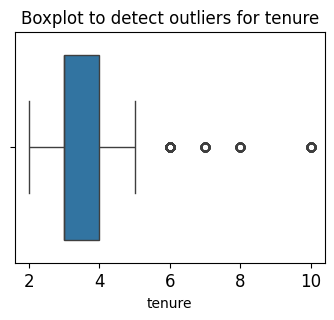

In [16]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(4,3))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df_cleaned['tenure'])
plt.show()

we can also show all columns to check the outliners 

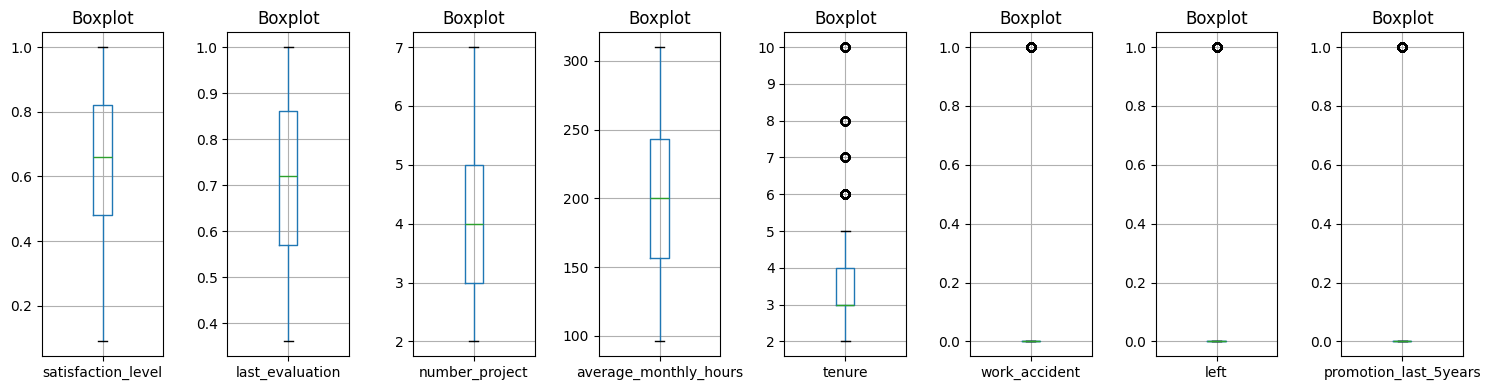

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(15, 4))
# List of columns to plot
columns = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours',\
           'tenure','work_accident','left','promotion_last_5years']

# Loop through each column and create a boxplot in the respective subplot
for ax, column in zip(axes, columns):
    df_cleaned.boxplot(column=column, ax=ax)
    ax.set_title(f'Boxplot')
    
# Adjust layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

#### P_EDA Step 1.5 IQR step to mesuer outliners

The Interquartile Range (IQR) is a measure of statistical dispersion and is used to describe the spread of the middle 50% of the values in a dataset. It is a robust measure of variability that is less affected by outliers and extreme values than other measures like the standard deviation.

Definition
The IQR is defined as the difference between the third quartile (Q3) and the first quartile (Q1):
IQR = Q3 - Q1

Q1 (First Quartile): The value below which 25% of the data fall.
Q3 (Third Quartile): The value below which 75% of the data fall.

Steps to Calculate IQR
Order the data: Arrange the data in increasing order.
Find Q1: The first quartile is the median of the lower half of the data (not including the median if the number of observations is odd).
Find Q3: The third quartile is the median of the upper half of the data.
Calculate IQR: Subtract Q1 from Q3.

In [18]:
# Determine the number of rows containing outliers 

# Compute the 25th percentile value in `tenure`
percentile25 = df_cleaned['tenure'].quantile(0.25)

# Compute the 75th percentile value in `tenure`
percentile75 = df_cleaned['tenure'].quantile(0.75)

# Compute the interquartile range in `tenure`
iqr = percentile75 - percentile25

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df_cleaned[(df_cleaned['tenure'] > upper_limit) | (df_cleaned['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


---

## pAce: Analyze

### Perform EDA (analyze relationships between variables) 

### Analyze: EDA_Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [19]:
# Get numbers of people who left vs. stayed
"""
df_cleaned.value_counts()
    normalize: If True, returns the relative frequencies of the unique values.
    sort: If True (default), sorts the counts in descending order.
    ascending: If True, sorts the counts in ascending order.
    bins: If an integer is provided, bins the values into that many equal-sized intervals.
    dropna: If True (default), does not include counts of NaN values.
"""

print(df_cleaned['left'].value_counts())

print('\n')

# Get percentages of people who left vs. stayed
print(df_cleaned['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64


left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


### Data visualizations

create plots to visualize relationships between variables in the data.

#### A_EDA Step 2.1 Check average_monthly_hours & number_project VS left

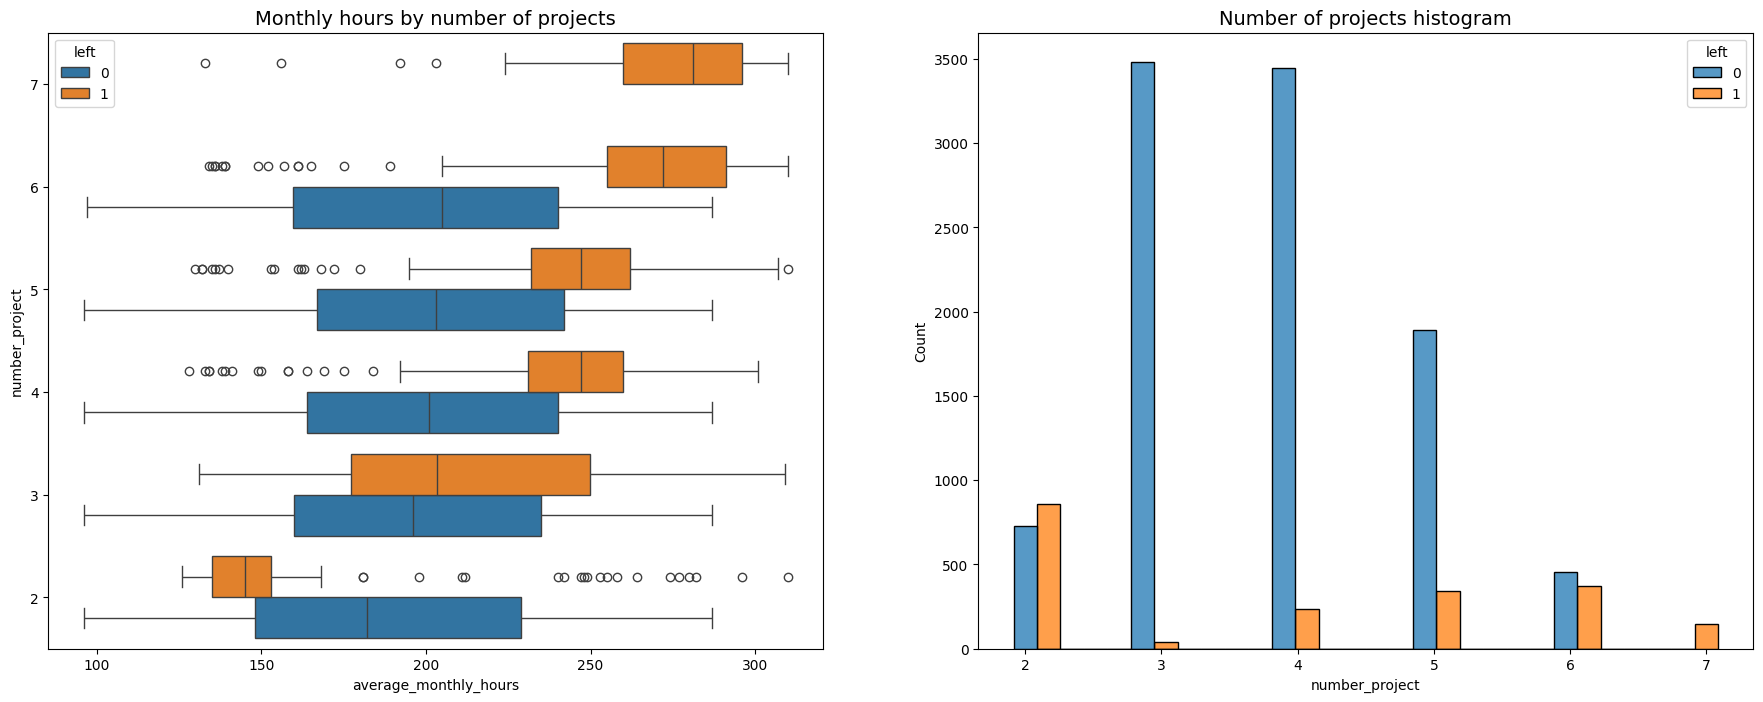

In [20]:
# Create a plot as needed 

# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df_cleaned, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df_cleaned[df_cleaned['left']==0]['number_project']
tenure_left = df_cleaned[df_cleaned['left']==1]['number_project']
sns.histplot(data=df_cleaned, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.

1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

As the next step, you could confirm that all employees with seven projects left.ects left.

In [21]:
# Get value counts of stayed/left for employees with 7 projects
df_cleaned[df_cleaned['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

This confirms that all employees with 7 projects did leave. 

Next, we can examine the average monthly hours versus the satisfaction levels. 

#### A_EDA Step 2.2 Check average_monthly_hours & satisfaction_level VS left

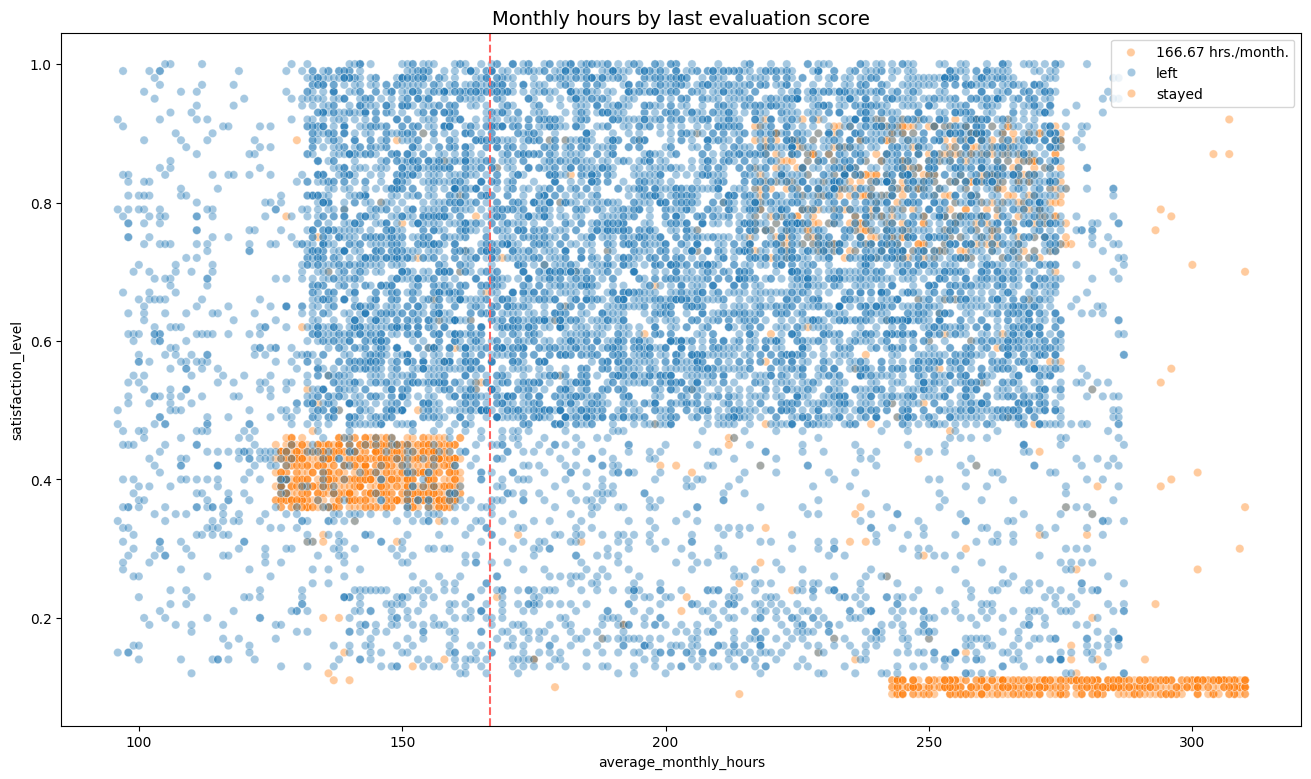

In [22]:
# Create scatterplot of `average_monthly_hours` versus `satisfaction_level`, comparing employees who stayed versus those who left
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_cleaned, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./month.', ls='--')
plt.legend(labels=['166.67 hrs./month.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The scatterplot above shows that there was a sizeable group of employees who worked ~240&ndash;315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It's likely this is related to their satisfaction levels being close to zero. 

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels. 

Finally, there is a group who worked ~210&ndash;280 hours per month, and they had satisfaction levels ranging ~0.7&ndash;0.9. 

Note the strange shape of the distributions here. This is indicative of data manipulation or synthetic data. 

For the next visualization, it might be interesting to visualize satisfaction levels by tenure.

#### A_EDA Step 2.3 Check satisfaction_level & tenure VS left

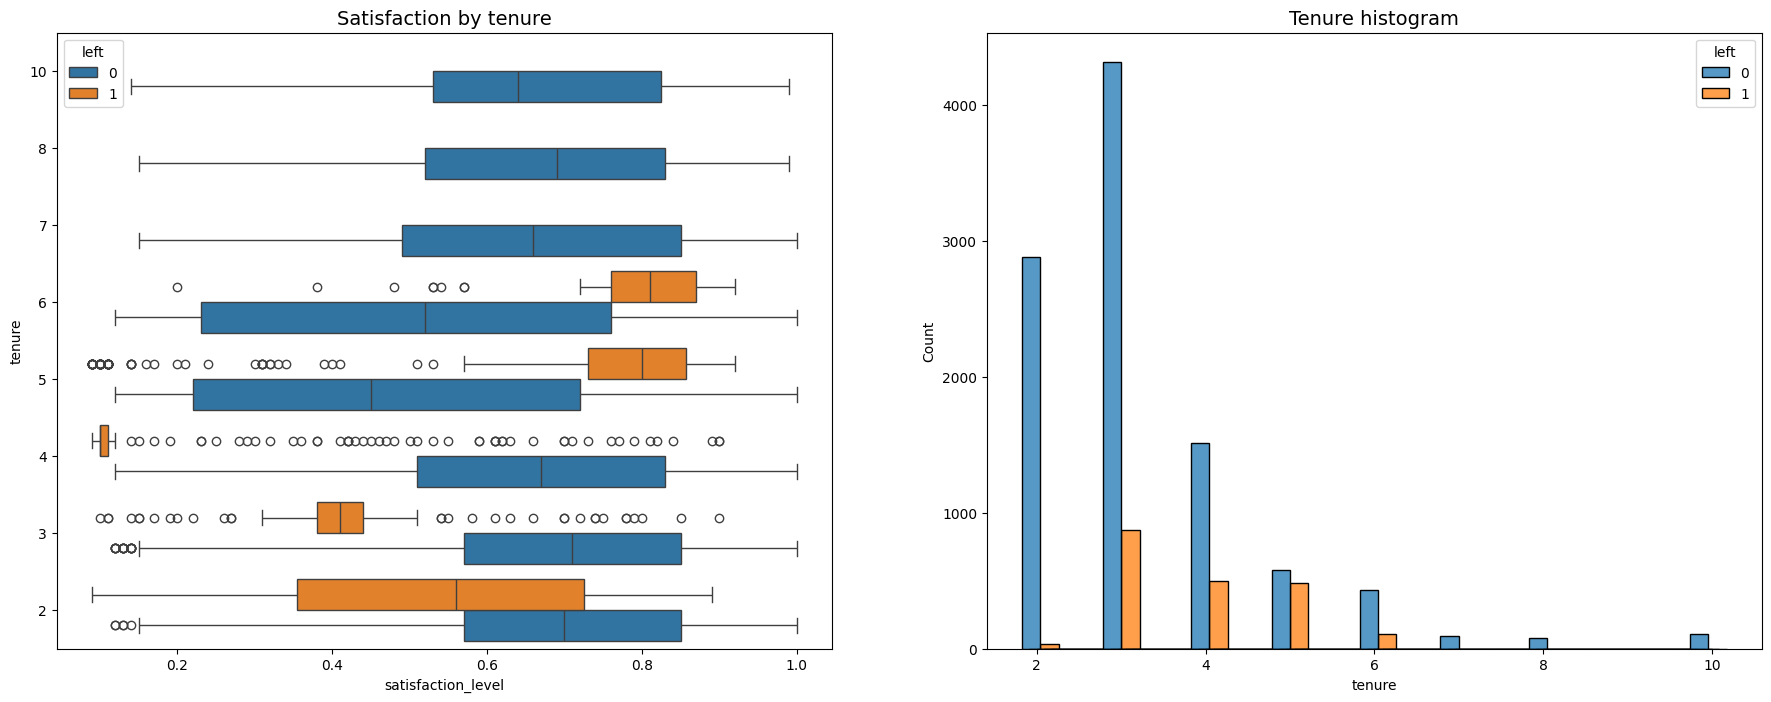

In [23]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing distributions of `satisfaction_level` by tenure, comparing employees who stayed versus those who left
sns.boxplot(data=df_cleaned, x='satisfaction_level', y='tenure', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Satisfaction by tenure', fontsize='14')

# Create histogram showing distribution of `tenure`, comparing employees who stayed versus those who left
tenure_stay = df_cleaned[df_cleaned['left']==0]['number_project']
tenure_left = df_cleaned[df_cleaned['left']==1]['number_project']
sns.histplot(data=df_cleaned, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Tenure histogram', fontsize='14')

plt.show();

There are many observations you could make from this plot.

Employees who left fall into two general categories: dissatisfied employees with shorter tenures and very satisfied employees with medium-length tenures.
Four-year employees who left seem to have an unusually low satisfaction level. It's worth investigating changes to company policy that might have affected people specifically at the four-year mark, if possible.
The longest-tenured employees didn't leave. Their satisfaction levels aligned with those of newer employees who stayed.
The histogram shows that there are relatively few longer-tenured employees. It's possible that they're the higher-ranking, higher-paid employees.
As the next step in analyzing the data, you could calculate the mean and median satisfaction scores of employees who left and those who didn't.

In [24]:
# Calculate mean and median satisfaction scores of employees who left and those who stayed
df_cleaned.groupby(['left'])['satisfaction_level'].agg(['mean','median'])

,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Interestingly, among employees who stayed, the mean satisfaction score appears to be slightly below the median score. This indicates that satisfaction levels among those who stayed might be skewed to the left.

Next, we could examine salary levels for different tenures.

#### A_EDA Step 2.4 Check tenure & salary VS left

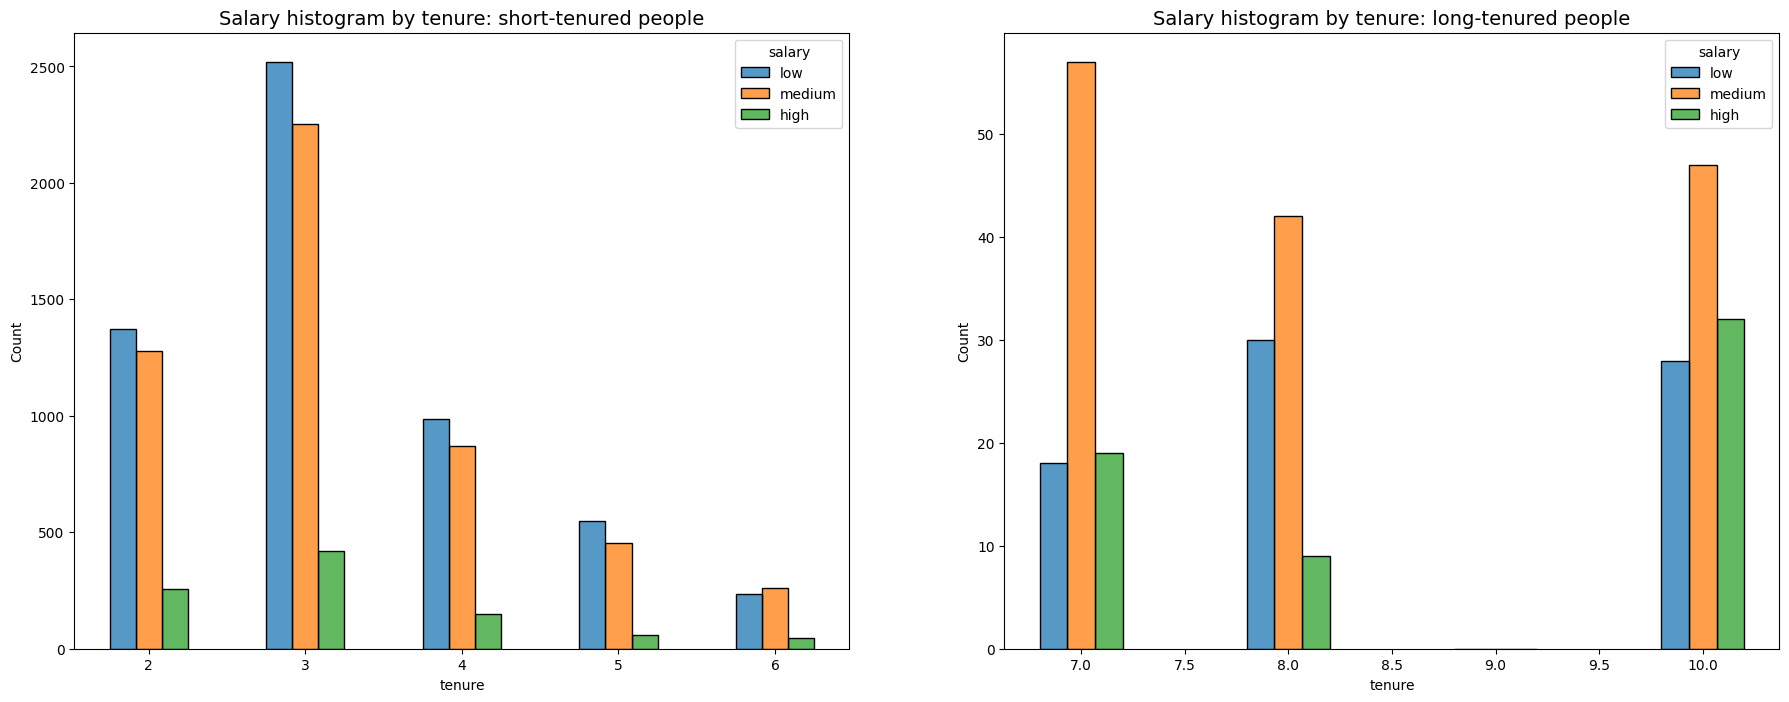

In [25]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Define short-tenured employees
tenure_short = df_cleaned[df_cleaned['tenure'] < 7]

# Define long-tenured employees
tenure_long = df_cleaned[df_cleaned['tenure'] > 6]

# Plot short-tenured histogram
sns.histplot(data=tenure_short, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.5, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize='14')

# Plot long-tenured histogram
sns.histplot(data=tenure_long, x='tenure', hue='salary', discrete=1, 
             hue_order=['low', 'medium', 'high'], multiple='dodge', shrink=.4, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize='14');

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees. 

Next, you could explore whether there's a correlation between working long hours and receiving high evaluation scores. You could create a scatterplot of `average_monthly_hours` versus `last_evaluation`.

#### A_EDA Step 2.5 Check average_monthly_hours & last_evaluation VS left

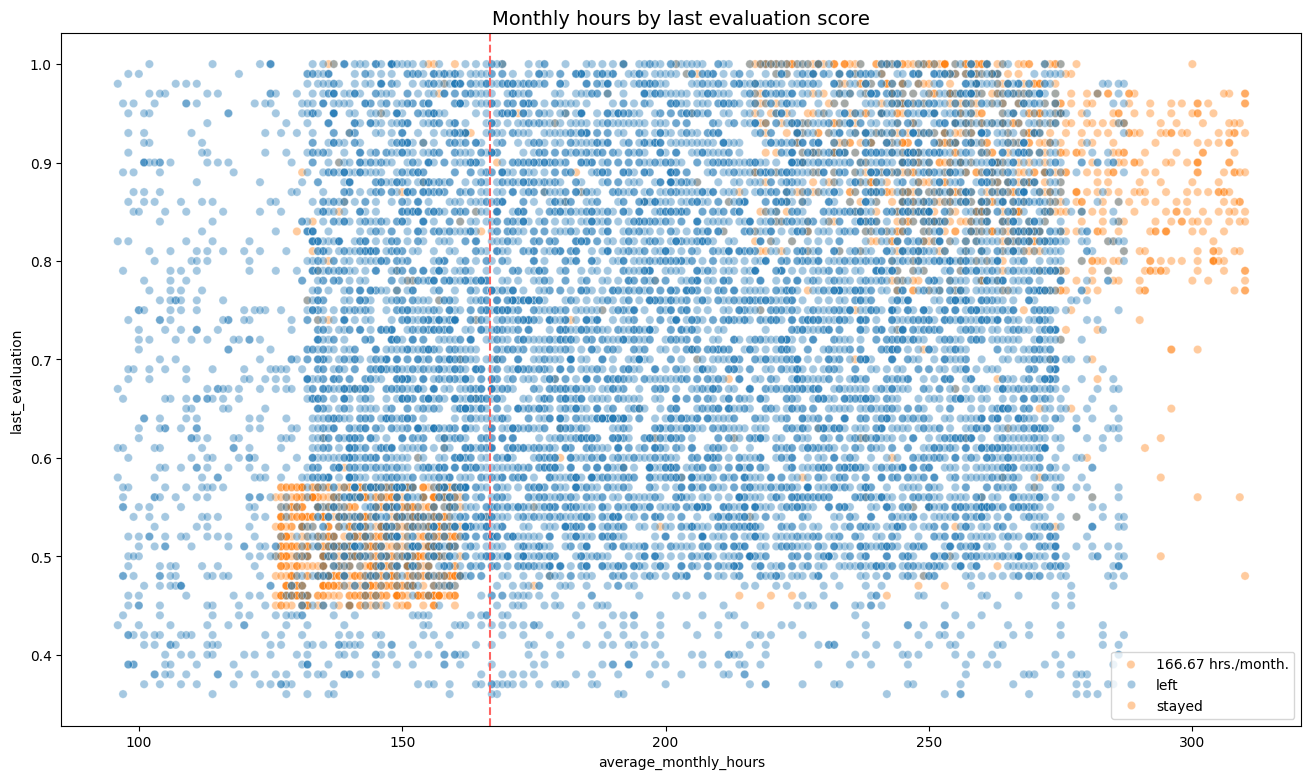

In [26]:
# Create scatterplot of `average_monthly_hours` versus `last_evaluation`
plt.figure(figsize=(16, 9))
sns.scatterplot(data=df_cleaned, x='average_monthly_hours', y='last_evaluation', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', label='166.67 hrs./month.', ls='--')
plt.legend(labels=['166.67 hrs./month.', 'left', 'stayed'])
plt.title('Monthly hours by last evaluation score', fontsize='14');

The following observations can be made from the scatterplot above:
- The scatterplot indicates two groups of employees who left: overworked employees who performed very well and employees who worked slightly under the nominal monthly average of 166.67 hours with lower evaluation scores. 
- There seems to be a correlation between hours worked and evaluation score. 
- There isn't a high percentage of employees in the upper left quadrant of this plot; but working long hours doesn't guarantee a good evaluation score.
- Most of the employees in this company work well over 167 hours per month.

Next, you could examine whether employees who worked very long hours were promoted in the last five years.

#### A_EDA Step 2.6 Check average_monthly_hours & promotion_last_5years VS left

Text(0.5, 1.0, 'Monthly hours by promotion last 5 years')

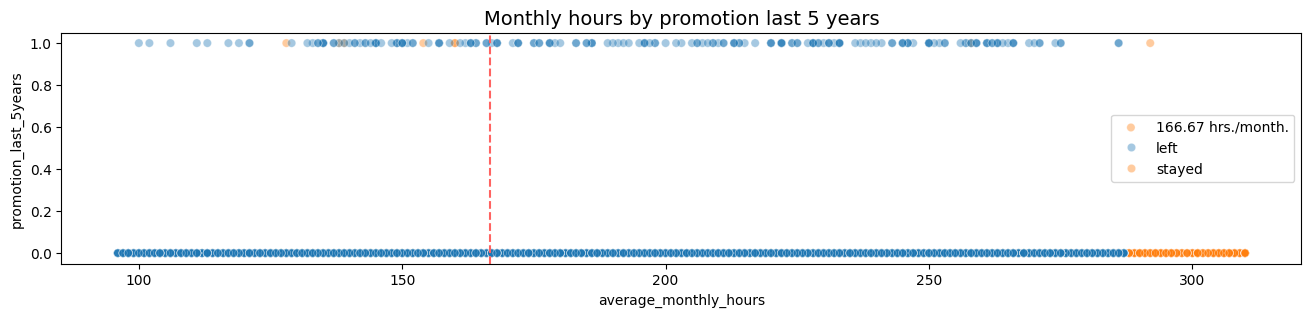

In [29]:
# Create plot to examine relationship between `average_monthly_hours` and `promotion_last_5years`

plt.figure(figsize=(16, 3))
sns.scatterplot(data=df_cleaned, x='average_monthly_hours', y='promotion_last_5years', hue='left', alpha=0.4)
plt.axvline(x=166.67, color='#ff6361', ls='--')
plt.legend(labels=['166.67 hrs./month.', 'left', 'stayed'])
plt.title('Monthly hours by promotion last 5 years', fontsize='14')

The plot above shows the following:
- very few employees who were promoted in the last five years left
- very few employees who worked the most hours were promoted
- all of the employees who left were working the longest hours  

Next, you could inspect how the employees who left are distributed across departments.

#### A_EDA Step 2.7 Check department VS left

In [30]:
# Display counts for each department
df_cleaned["department"].value_counts()

department
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

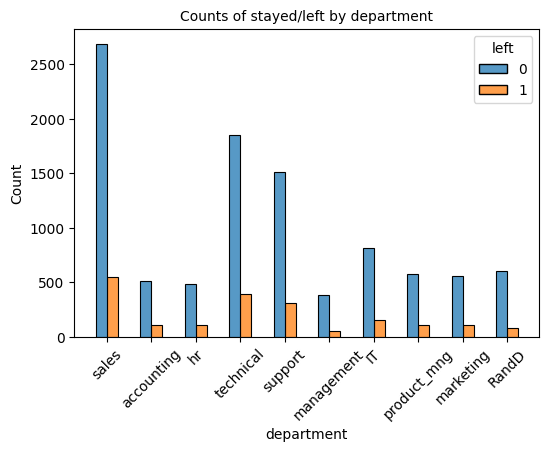

In [31]:
# Create stacked histogram to compare department distribution of employees who left to that of employees who didn't
plt.figure(figsize=(6,4))
sns.histplot(data=df_cleaned, x='department', hue='left', discrete=1, 
             hue_order=[0, 1], multiple='dodge', shrink=0.5)
plt.xticks(rotation=45)
plt.title('Counts of stayed/left by department', fontsize=10);


There doesn't seem to be any department that differs significantly in its proportion of employees who left to those who stayed. 

Lastly, you could check for strong correlations between variables in the data.

#### A_EDA Step 2.8 Check correlations between variables

Text(0.5, 1.0, 'Correlation Heatmap')

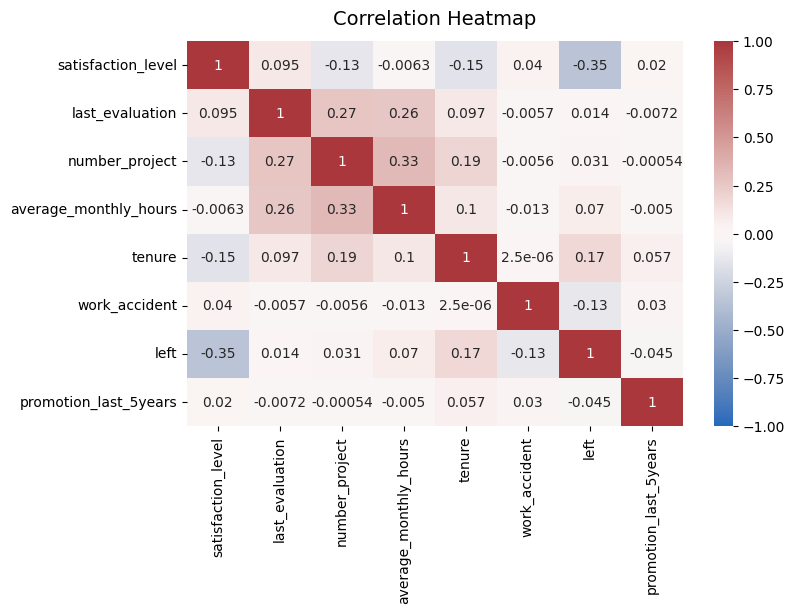

In [33]:
# Plot a correlation heatmap

select_columns = ['satisfaction_level','last_evaluation','number_project','average_monthly_hours',\
           'tenure','work_accident','left','promotion_last_5years']


plt.figure(figsize=(8, 5))
heatmap = sns.heatmap(df_cleaned[select_columns].corr(), vmin=-1, vmax=1, annot=True, cmap=sns.color_palette("vlag", as_cmap=True))
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':14}, pad=12)

The correlation heatmap confirms that the number of projects, monthly hours, and evaluation scores all have some positive correlation with each other, and whether an employee leaves is negatively correlated with their satisfaction level.

### Gather all information

It appears that employees are leaving the company as a result of poor management. Leaving is tied to longer working hours, many projects, and generally lower satisfaction levels. It can be ungratifying to work long hours and not receive promotions or good evaluation scores. There's a sizeable group of employees at this company who are probably burned out. It also appears that if an employee has spent more than six years at the company, they tend not to leave. 

## paCe: Construct

- Determine which models are most appropriate
- Construct the model 
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data

### Construct Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

#### C_EDA Step 3.1 Modeling Approach: Logistic Regression

Note that binomial logistic regression suits the task because it involves binary classification.

Before splitting the data, encode the non-numeric variables. There are two: `department` and `salary`. 

`department` is a categorical variable, which means you can dummy it for modeling. 

`salary` is categorical too, but it's ordinal. There's a hierarchy to the categories, so it's better not to dummy this column, but rather to convert the levels to numbers, 0&ndash;2.

In [37]:
# Copy the dataframe
df_enc = df_cleaned.copy()

# Encode the `salary` column as an ordinal numeric category
df_enc['salary'] = (
    df_enc['salary'].astype('category')
    .cat.set_categories(['low', 'medium', 'high'])
    .cat.codes
)

# Dummy encode the `department` column
df_enc = pd.get_dummies(df_enc, drop_first=False)

# Display the new dataframe
df_enc.head(n=10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
6,0.10,0.77,6,247,4,0,1,0,0,False,False,False,False,False,False,False,True,False,False
7,0.92,0.85,5,259,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
8,0.89,1.00,5,224,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
9,0.42,0.53,2,142,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


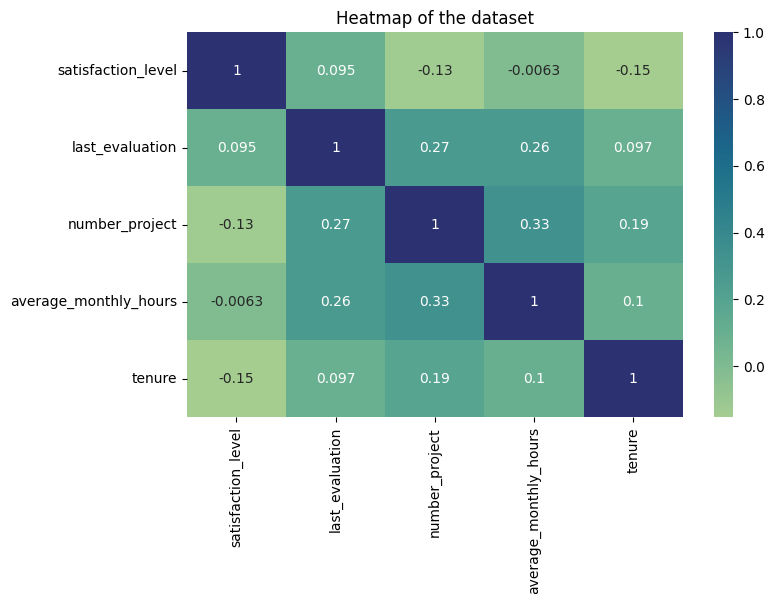

In [40]:
# Create a heatmap to visualize how correlated variables are
plt.figure(figsize=(8, 5))
sns.heatmap(df_enc[['satisfaction_level', 'last_evaluation', 'number_project', 'average_monthly_hours', 'tenure']]
            .corr(), annot=True, cmap="crest")
plt.title('Heatmap of the dataset')
plt.show()

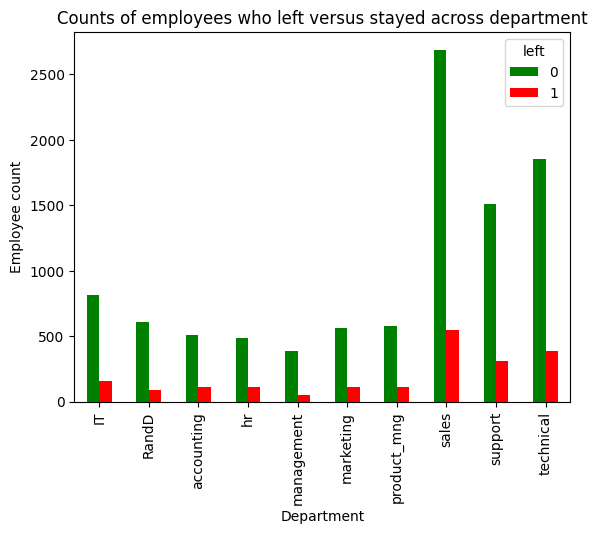

In [42]:
# Create a stacked bart plot to visualize number of employees across department, comparing those who left with those who didn't
# In the legend, 0 (purple color) represents employees who did not leave, 1 (red color) represents employees who left
pd.crosstab(df_cleaned['department'], df_cleaned['left']).plot(kind ='bar',color='gr')
plt.title('Counts of employees who left versus stayed across department')
plt.ylabel('Employee count')
plt.xlabel('Department')
plt.show()

In [43]:
# Select rows without outliers in `tenure` and save resulting dataframe in a new variable
df_logreg = df_enc[(df_enc['tenure'] >= lower_limit) & (df_enc['tenure'] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head(n=10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
6,0.10,0.77,6,247,4,0,1,0,0,False,False,False,False,False,False,False,True,False,False
7,0.92,0.85,5,259,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
8,0.89,1.00,5,224,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
9,0.42,0.53,2,142,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
10,0.45,0.54,2,135,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [46]:
# Isolate the outcome variable
y = df_logreg['left']

# Display first few rows of the outcome variable
y.head(n=10) 

0     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
Name: left, dtype: int64

In [47]:
# Select the features you want to use in your model
X = df_logreg.drop('left', axis=1)

# Display the first few rows of the selected features 
X.head(n=10)

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,0,0,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,0,0,False,False,False,False,False,False,False,True,False,False
5,0.41,0.50,2,153,3,0,0,0,False,False,False,False,False,False,False,True,False,False
6,0.10,0.77,6,247,4,0,0,0,False,False,False,False,False,False,False,True,False,False
7,0.92,0.85,5,259,5,0,0,0,False,False,False,False,False,False,False,True,False,False
8,0.89,1.00,5,224,5,0,0,0,False,False,False,False,False,False,False,True,False,False
9,0.42,0.53,2,142,3,0,0,0,False,False,False,False,False,False,False,True,False,False
10,0.45,0.54,2,135,3,0,0,0,False,False,False,False,False,False,False,True,False,False


In [48]:
# Split the data into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

In [49]:
# Construct a logistic regression model and fit it to the training dataset
log_clf = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)

In [50]:
# Use the logistic regression model to get predictions on the test set
y_pred = log_clf.predict(X_test)

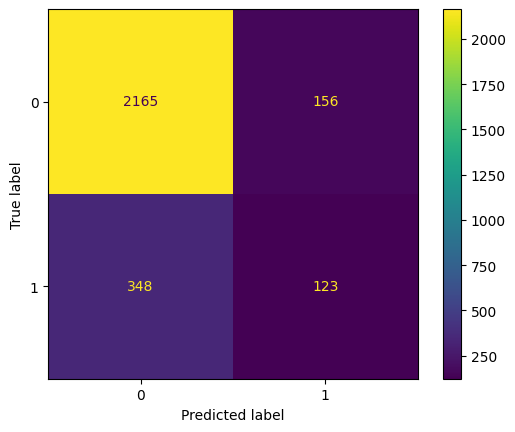

In [51]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, 
                                  display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot(values_format='')

# Display plot
plt.show()

- The upper-left quadrant displays the number of true negatives.
- The upper-right quadrant displays the number of false positives.
- The bottom-left quadrant displays the number of false negatives.
- The bottom-right quadrant displays the number of true positives.

True negatives: The number of people who did not leave that the model accurately predicted did not leave.

False positives: The number of people who did not leave the model inaccurately predicted as leaving.

False negatives: The number of people who left that the model inaccurately predicted did not leave

True positives: The number of people who left the model accurately predicted as leaving

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

Check the class balance in the data. In other words, check the value counts in the `left` column. Since this is a binary classification task, the class balance informs the way you interpret accuracy metrics.

In [52]:
df_logreg['left'].value_counts(normalize=True)

left
0    0.831468
1    0.168532
Name: proportion, dtype: float64

There is an approximately 83%-17% split. So the data is not perfectly balanced, but it is not too imbalanced. If it was more severely imbalanced, you might want to resample the data to make it more balanced. In this case, you can use this data without modifying the class balance and continue evaluating the model.

In [53]:
# Create classification report for logistic regression model
target_names = ['Predicted would not leave', 'Predicted would leave']
print(classification_report(y_test, y_pred, target_names=target_names))

                           precision    recall  f1-score   support

Predicted would not leave       0.86      0.93      0.90      2321
    Predicted would leave       0.44      0.26      0.33       471

                 accuracy                           0.82      2792
                macro avg       0.65      0.60      0.61      2792
             weighted avg       0.79      0.82      0.80      2792



The classification report above shows that the logistic regression model achieved a precision of 79%, recall of 82%, f1-score of 80% (all weighted averages), and accuracy of 82%. However, if it's most important to predict employees who leave, then the scores are significantly lower.